# Omar Kandeel

## Is committing crimes correlated with specific stadiums and/or teams? (Geographical/team-cultural influence)

We are going to be looking at the crime rates and see whether they are correlated to specific teams and/or stadiums, and whether or not it can be predicted.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rawarrest = pd.read_csv('../data/raw/arrests.csv', sep= ",")
rawarrest

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,NaN,5.0,n
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,NaN,6.0,n
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,NaN,9.0,n
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,OT,6.0,y
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,OT,3.0,n
...,...,...,...,...,...,...,...,...,...,...,...
1001,2015,7,Sunday,1:00:00 PM,Washington,Tampa Bay,31,30,NaN,2.0,n
1002,2015,10,Sunday,1:00:00 PM,Washington,New Orleans,47,14,NaN,2.0,n
1003,2015,12,Sunday,1:00:00 PM,Washington,New York Giants,20,14,NaN,2.0,y
1004,2015,13,Monday,8:30:00 PM,Washington,Dallas,16,19,NaN,4.0,y


## Milestone 3
---
### An Exploratory Data Analysis (EDA) on your dataset

Quick output of head and tail for the data.

In [5]:
rawarrest.head()

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,NaN,5.0,n
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,NaN,6.0,n
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,NaN,9.0,n
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,OT,6.0,y
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,OT,3.0,n


In [6]:
rawarrest.tail()

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
1001,2015,7,Sunday,1:00:00 PM,Washington,Tampa Bay,31,30,NaN,2.0,n
1002,2015,10,Sunday,1:00:00 PM,Washington,New Orleans,47,14,NaN,2.0,n
1003,2015,12,Sunday,1:00:00 PM,Washington,New York Giants,20,14,NaN,2.0,y
1004,2015,13,Monday,8:30:00 PM,Washington,Dallas,16,19,NaN,4.0,y
1005,2015,15,Sunday,1:00:00 PM,Washington,Buffalo,35,25,NaN,1.0,n


Get the columns of the raw data and the number of columns to see how extensive the list is

In [7]:
rawColumns = list(rawarrest.columns)
print(f"Columns: {rawColumns}")
print(f"Column count: {len(rawColumns)}")

Columns: ['season', 'week_num', 'day_of_week', 'gametime_local', 'home_team', 'away_team', 'home_score', 'away_score', 'OT_flag', 'arrests', 'division_game']
Column count: 11


The data on NFL arrests has 11 columns that are:
1. Season = The corresponding seas for the data entry.
2. Week Number = The week or gameday week when the data entry took place
3. Day of week = The day of the week when the data entry took place.
4. Gametime Local = The local time of the scheduled game.
5. Home team = The corresponding home team.
6. Away team = Corresponding away team.
7. Home score = Corresponding home score.
8. Away score = Corresponding away score.
9. OT Flag = Data variable to confirm if the game went into overtime for the corresponding data entry.
10. Arrests = Number of arrests recorded during matchday.
11. Division game = Data variable to confirm if the game was an inter-divisional game (Higher significance/rivalry).

For this corresponding research question,the data aims to address the influence of time and data in relation to arrests made in the stadium. To do this the data needs to be reformatted to include only the following variables:
- Season (For referencing)
- Arrests
- Home Team
- Away Team
- Overtime (OT)

But first lets take a deeper look into our data.

In [8]:
rawarrest.describe()

,season,week_num,home_score,away_score,arrests
count,1006.000000,1006.000000,1006.000000,1006.000000,966.000000
mean,2013.000000,9.116302,23.934394,21.115308,6.566253
std,1.406453,5.008986,10.442626,9.734006,9.512101
min,2011.000000,1.000000,0.000000,0.000000,0.000000
25%,2012.000000,5.000000,17.000000,14.000000,1.000000
50%,2013.000000,9.000000,23.000000,20.000000,3.000000
75%,2014.000000,14.000000,30.000000,27.000000,8.000000
max,2015.000000,17.000000,59.000000,56.000000,69.000000


In [9]:
rawarrest.season.unique() #Season

array([2011, 2012, 2013, 2014, 2015], dtype=int64)

In [10]:
rawarrest.arrests.unique() #Arrests

array([ 5.,  6.,  9.,  3.,  4.,  1.,  0., 12.,  7.,  2., 10.,  8., 15.,
       13., 11., nan, 21., 18., 16., 14., 19., 23., 26., 35., 31., 39.,
       20., 29., 46., 22., 24., 33., 28., 34., 30., 38., 17., 27., 25.,
       44., 32., 49., 52., 37., 56., 69., 41., 47., 45., 40., 60., 36.])

In [11]:
rawarrest.home_score.unique() #Home team score

array([28, 27, 20, 19, 21, 23, 24,  3, 17, 38, 13, 25, 22, 40, 30, 18, 31,
       14,  6, 47, 26, 34, 35, 29, 16,  7, 33, 48, 12,  9, 10, 37, 39, 41,
       45, 15,  8, 49, 42, 36, 44, 52, 51, 32, 46, 55, 53, 43,  2, 59,  0,
       54, 58, 11], dtype=int64)

The scores seem to look great, there are integers for them all, and 0 for the games that had no score from the home team.

In [12]:
rawarrest.away_score.unique() #Away team score

array([21, 31, 32, 13, 19, 17, 20, 16,  6, 24, 10, 28, 34, 11, 23, 14, 35,
        7, 18,  8, 36, 27,  3, 26, 41, 12, 33, 22, 30,  0, 15, 37, 29, 38,
        9, 42, 51, 39, 45, 25, 44, 40, 49, 43, 56, 48], dtype=int64)

The scores seem to look great, there are integers for them all, and 0 for the games that had no score from the away team.

In [13]:
rawarrest.day_of_week.unique() #Day of the week

array(['Sunday', 'Monday', 'Thursday', 'Saturday', 'Wednesday'],
      dtype=object)

In [14]:
rawarrest.OT_flag.unique() #Overtime

array([nan, 'OT'], dtype=object)

The authors of this data defined games that did not have an overtime period with 'NaN'.

In [15]:
rawarrest.gametime_local.unique() #Gametime (local time)

array(['1:15:00 PM', '1:05:00 PM', '2:15:00 PM', '2:05:00 PM',
       '1:25:00 PM', '5:30:00 PM', '2:25:00 PM', '5:25:00 PM',
       '7:20:00 PM', '6:30:00 PM', '8:20:00 PM', '4:05:00 PM',
       '1:00:00 PM', '8:30:00 PM', '4:25:00 PM', '8:25:00 PM',
       '1:02:00 PM', '8:40:00 PM', '12:00:00 PM', '3:25:00 PM',
       '3:15:00 PM', '7:30:00 PM', '7:25:00 PM', '7:40:00 PM',
       '1:03:00 PM', '4:16:00 PM', '3:30:00 PM', '8:15:00 PM',
       '6:20:00 PM', '6:40:00 PM', '6:25:00 PM', '12:30:00 PM',
       '7:10:00 PM', '3:05:00 PM', '4:15:00 PM', '7:15:00 PM',
       '5:20:00 PM', '8:35:00 PM', '5:40:00 PM', '1:06:00 PM',
       '5:41:00 PM', '1:26:00 PM', '5:31:00 PM', '5:42:00 PM',
       '1:27:00 PM', '4:30:00 PM'], dtype=object)

---
Everything here is in a HH:MM:SS format.

[Text(0.5, 1.0, 'Average arrests during the week (First 100)'),
 Text(0, 0.5, 'Arrests'),
 Text(0.5, 0, 'Day of the week')]

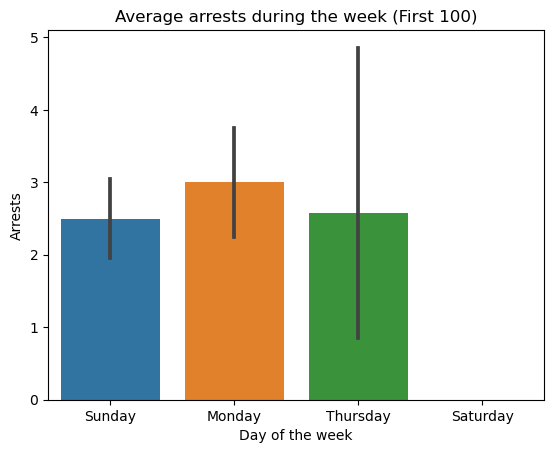

In [16]:
rawheaddf = rawarrest.head(100)
sns.barplot(x='day_of_week', y = 'arrests', data=rawheaddf).set(title='Average arrests during the week (First 100)',ylabel='Arrests', xlabel='Day of the week')

The the first chunk of datapoints is evidently sorted on based days of the week and requires reformatting to account for Saturday in a finalized analysis.
    
Now let's observe a sample of (50) data points and see a histogram analysis for total arrests during game/matchday weeks.

<AxesSubplot:>

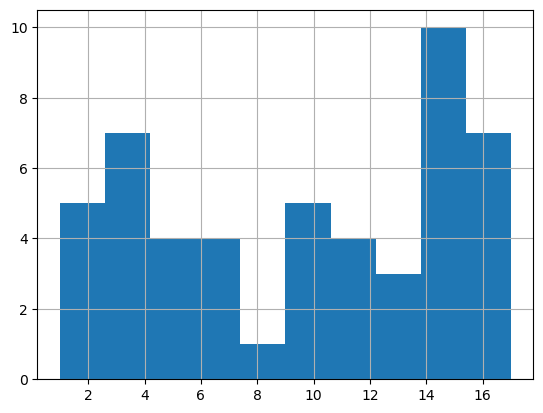

In [17]:
rawsampledf= rawarrest.sample(50)
weektest = rawsampledf['week_num']
weektest.hist()

This sample shows that there were no arrests made during the weeks 4-6 and none made during the weeks 12-14.

However, what if we were to look at the high-end number of arrests not just a random sample.

In [18]:
maxarrests = rawarrest[rawarrest['arrests'].gt(40)]
maxarrests

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
591,2013,12,Sunday,4:25:00 PM,New York Giants,Dallas,21,24,NaN,46.0,y
646,2015,10,Thursday,8:25:00 PM,New York Jets,Buffalo,17,22,NaN,44.0,y
677,2014,14,Sunday,1:25:00 PM,Oakland,San Francisco,24,13,NaN,49.0,n
739,2012,11,Sunday,8:20:00 PM,Pittsburgh,Baltimore,10,13,NaN,52.0,y
744,2013,3,Sunday,8:30:00 PM,Pittsburgh,Chicago,23,40,NaN,56.0,n
771,2011,10,Thursday,5:20:00 PM,San Diego,Oakland,17,24,NaN,69.0,y
772,2011,12,Sunday,1:15:00 PM,San Diego,Denver,13,16,OT,41.0,y
776,2012,3,Sunday,1:05:00 PM,San Diego,Atlanta,3,27,NaN,47.0,n
777,2012,6,Monday,5:30:00 PM,San Diego,Denver,24,35,NaN,45.0,y
782,2012,17,Sunday,1:25:00 PM,San Diego,Oakland,24,21,NaN,60.0,y


Interestingly, there is a correlation at first glance between home teams and higher arrests. 

**However**, we are looking at time and days for this set where there also seems to be higher arrests on home games.
  
One more thing I also want to view is the overall histogram data for **ALL** our variables and see what we are working with.

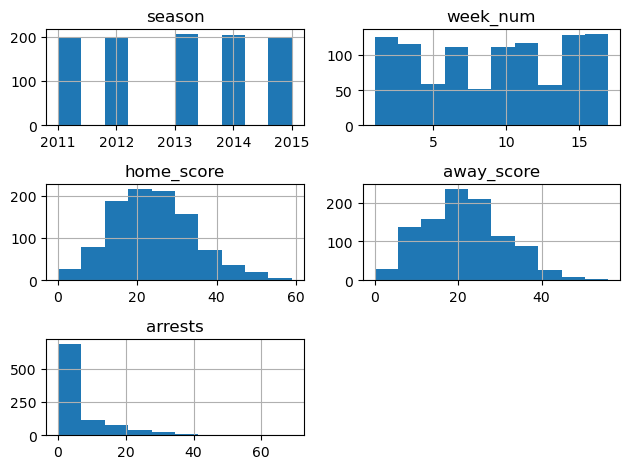

In [19]:
rawarrest.hist()
plt.tight_layout() #Avoid Title overlap

Arrests seem to be higher when there is a higher away score than the one for home scores.

---
## Analysis Pipeline

Let's the original arrests dataset again and keep only the columns we need to analyze our specific metric of groupthink.

Then we can sort the rows based on year/season and the corresponding day of the week. Additionally I also want to rename the columns appropriately for columns.

Once we complete this we can now save the data and implement it into a new dataframe in a processed output file.

In [20]:
#loading dataset
rawarrest = pd.read_csv('../data/raw/arrests.csv', sep= ",")
    
#Removing columns
formatdf = rawarrest.copy().drop(columns=['week_num', 'day_of_week', 'gametime_local', 'home_score', 'away_score', 'division_game'],axis=1).dropna(axis=0)

#Sorting
formatdf.sort_values(by=['season'],inplace=True)
    
#Rename columns
formatdf.rename(columns={'home_team':'Home Team','away_team':'Away Team','OT_flag': 'Overtime (OT)', 
                        'arrests':'Arrests', 'season':'Season'},inplace = True)
#Convert NaN values in arrests to 0
formatdf['Arrests'] = formatdf['Arrests'].fillna(0)

#Save the data in = processed output file
formatdf.to_csv('../data/processed/OKandeelProcessed.csv', index = False)

#Now let's quickly observe what our new data looks like
formatdf.head(10)

,Season,Home Team,Away Team,Overtime (OT),Arrests
3,2011,Arizona,St. Louis,OT,6.0
4,2011,Arizona,Dallas,OT,3.0
6,2011,Arizona,Cleveland,OT,1.0
7,2011,Arizona,Seattle,OT,4.0
467,2011,Kansas City,Oakland,OT,2.0
462,2011,Kansas City,San Diego,OT,2.0
970,2011,Washington,Dallas,OT,7.0
772,2011,San Diego,Denver,OT,41.0
228,2011,Denver,Chicago,OT,0.0
808,2011,San Francisco,Dallas,OT,4.0


---
## Method Chaining and writing Python programs

There are two methods for formatting and adjusting our final dataset.

The first method below loads our dataset file as an argument and does 3 things:
1. Drops all unneeded columns for our analysis question
2. Sorts the values by season and whether or not the game went into overtime.
3. Rename all strings appropriately.

In [21]:
loaddf = (pd.read_csv('../data/raw/arrests.csv', sep= ",").copy().drop(['week_num', 'day_of_week', 'gametime_local', 'home_score', 'away_score', 'division_game'], axis = 1))
loaddf.sort_values(by = ['season', 'OT_flag'], inplace = True)
loaddf.rename(columns = {'home_team':'Home Team','away_team':'Away Team','OT_flag': 'Overtime (OT)', 
                        'arrests':'Arrests', 'season':'Season'}, inplace = True)
loaddf.head()

,Season,Home Team,Away Team,Overtime (OT),Arrests
3,2011,Arizona,St. Louis,OT,6.0
4,2011,Arizona,Dallas,OT,3.0
6,2011,Arizona,Cleveland,OT,1.0
7,2011,Arizona,Seattle,OT,4.0
228,2011,Denver,Chicago,OT,0.0


#### The second method does takes the NaN variables in the arrest column to an integer valued 0.

In [22]:
finaldf = loaddf
finaldf['Arrests'] = finaldf['Arrests'].fillna(0)
finaldf.head()

,Season,Home Team,Away Team,Overtime (OT),Arrests
3,2011,Arizona,St. Louis,OT,6.0
4,2011,Arizona,Dallas,OT,3.0
6,2011,Arizona,Cleveland,OT,1.0
7,2011,Arizona,Seattle,OT,4.0
228,2011,Denver,Chicago,OT,0.0


### The method chain can now be imported:

In [27]:
import project_functions1 as p1

projectdf = p1.load_and_process('../data/raw/arrests.csv')
projectdf.head()


AttributeError: 'NoneType' object has no attribute 'head'

---
## Conduct Analysis

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
projectdf = pd.read_csv('../data/processed/OKandeelProcessed.csv')


Let's start with insight into what places result in most arrests.
First we will sum the amount of arrests per location, removing rows or times where no arrests occur and then plot:

In [45]:
dff2 = projectdf.groupby(["Home Team"]).Arrests.sum().reset_index() #Sorts by Home Team and sums arrests at each time
dff2 = dff2[dff2['Arrests'] != 0] #remove 0 arrests value for this plot
dff2.head()

,Home Team,Arrests
0,Arizona,19.0
1,Baltimore,3.0
2,Carolina,6.0
3,Chicago,3.0
4,Cincinnati,1.0


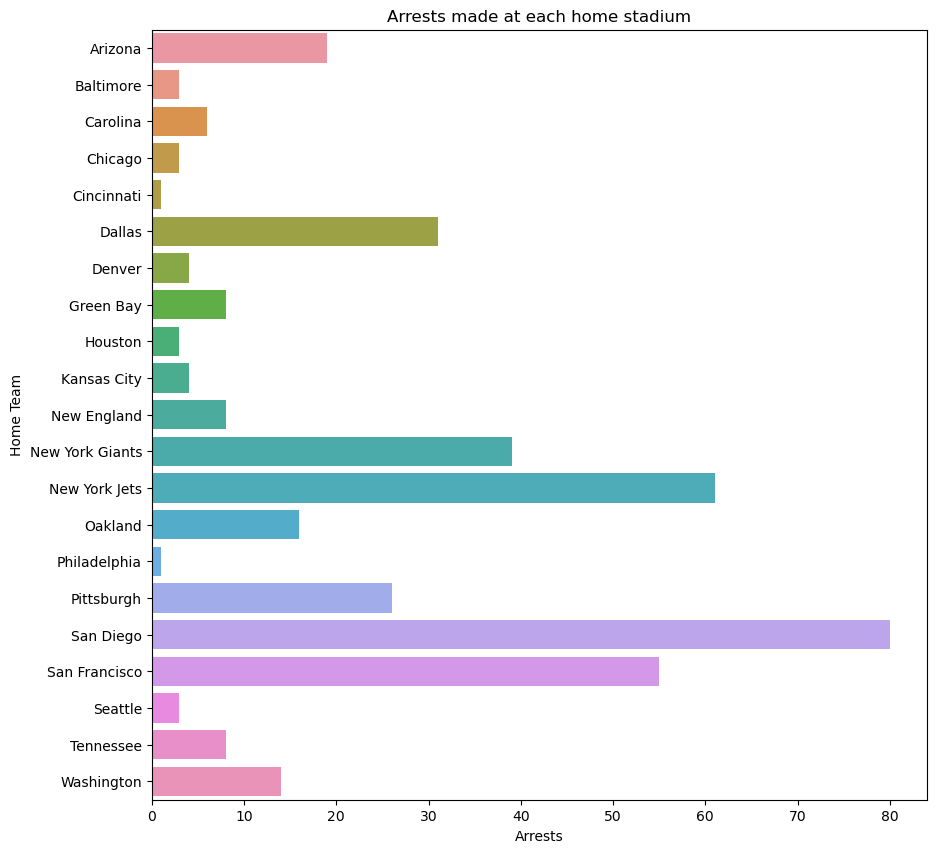

In [46]:
f, ax = plt.subplots(figsize=(10,10)) #Change figure size
sns.barplot(x='Arrests', y = 'Home Team', data=dff2).set(title='Arrests made at each home stadium',ylabel='Home Team', xlabel='Arrests') #PLot barplot
plt.savefig('..\\images\\HomeArrests.png')

Surprisingly enough, the stadium with the most arrests during their games was Sand Diego sitting at 80 arrests.
How about we look at the average arrests for each stadium?

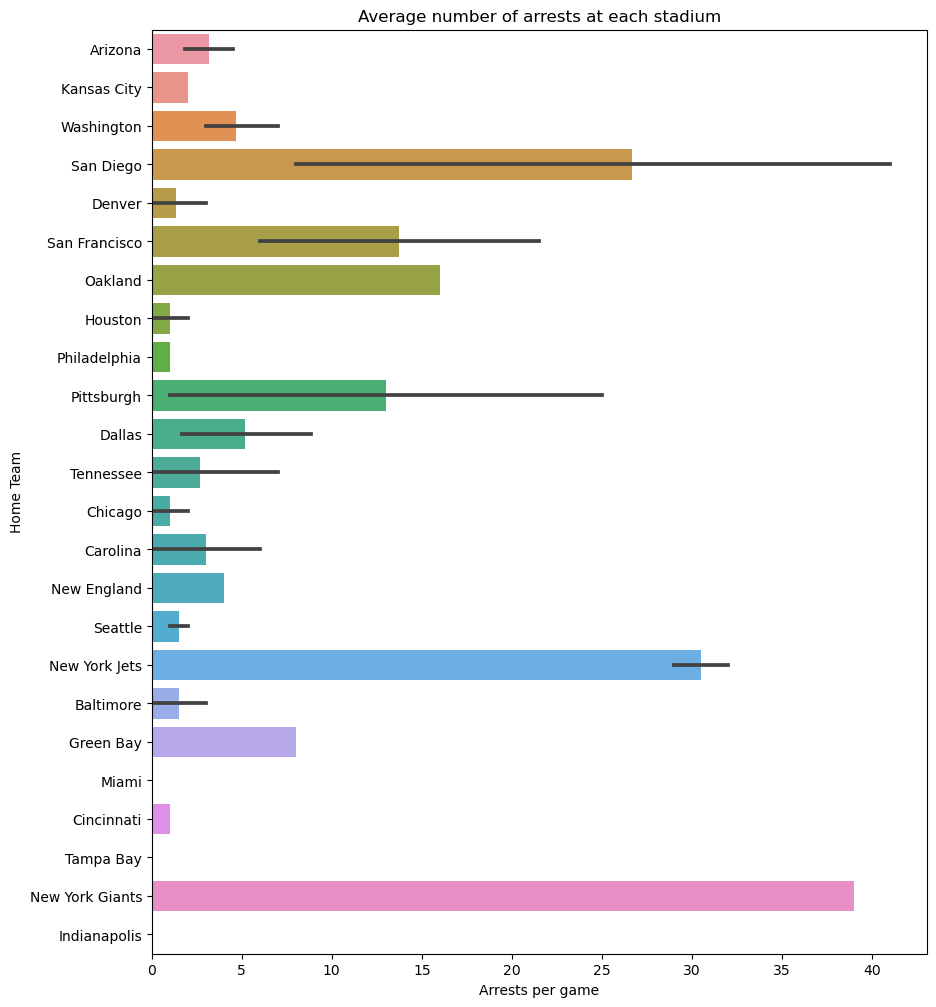

In [47]:
f, ax = plt.subplots(figsize=(10,12)) #Change figure size
sns.barplot(x='Arrests', y = 'Home Team', data=projectdf).set(title='Average number of arrests at each stadium',ylabel='Home Team', xlabel='Arrests per game') #PLot barplot
plt.savefig('..\\images\\AverageStadium.png')

Unsurprisingly, the Home team with the most arrests average is still San Diego, with the New York Jets coming a close second.
Let's take a closer look to the amount of games each team has on their home stadium.

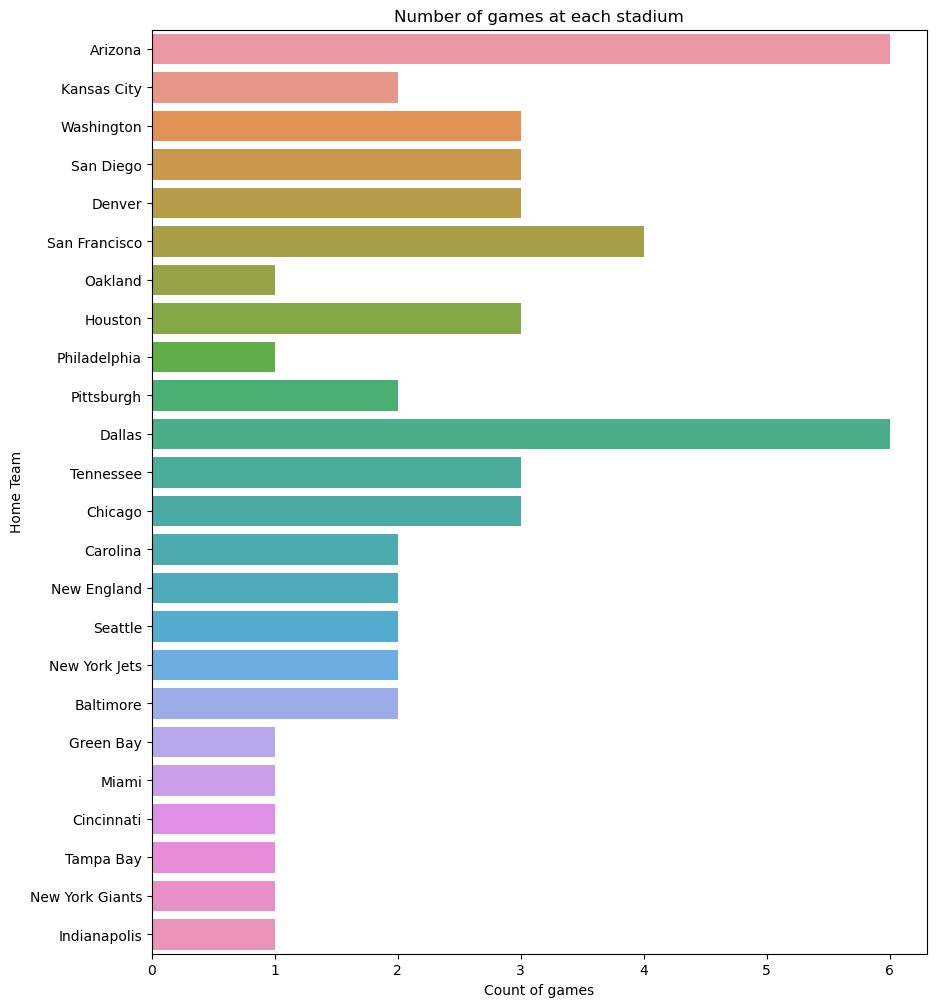

In [48]:
f, ax = plt.subplots(figsize=(10,12)) #Change figure size
sns.countplot(y='Home Team', data=projectdf).set(title='Number of games at each stadium',ylabel='Home Team', xlabel='Count of games')
plt.savefig('..\\images\\NumberofGames.png')

So as we can see, **San Diego** has half the amount of games as Arizona (the tied leader in the amount of home games), and yet Arizona has almost a 1/4 the arrests that San Diego has seen.

We can safely conclude that San Diego has a rowdier crowd compared to the rest of the teams that are part of the statistics.

Now let's look at whether or not the San Diego also has the highest number of arrests when they are playing at a different team's stadium.

In [33]:
dff3 = projectdf.groupby(["Away Team"]).Arrests.sum().reset_index() #Sorts by day and sums arrests by each away team
dff3 = dff3[dff3['Arrests'] != 0] #remove 0 for this plot
dff3.head()

,Away Team,Arrests
0,Arizona,7.0
1,Baltimore,38.0
2,Buffalo,2.0
3,Carolina,1.0
5,Cincinnati,1.0


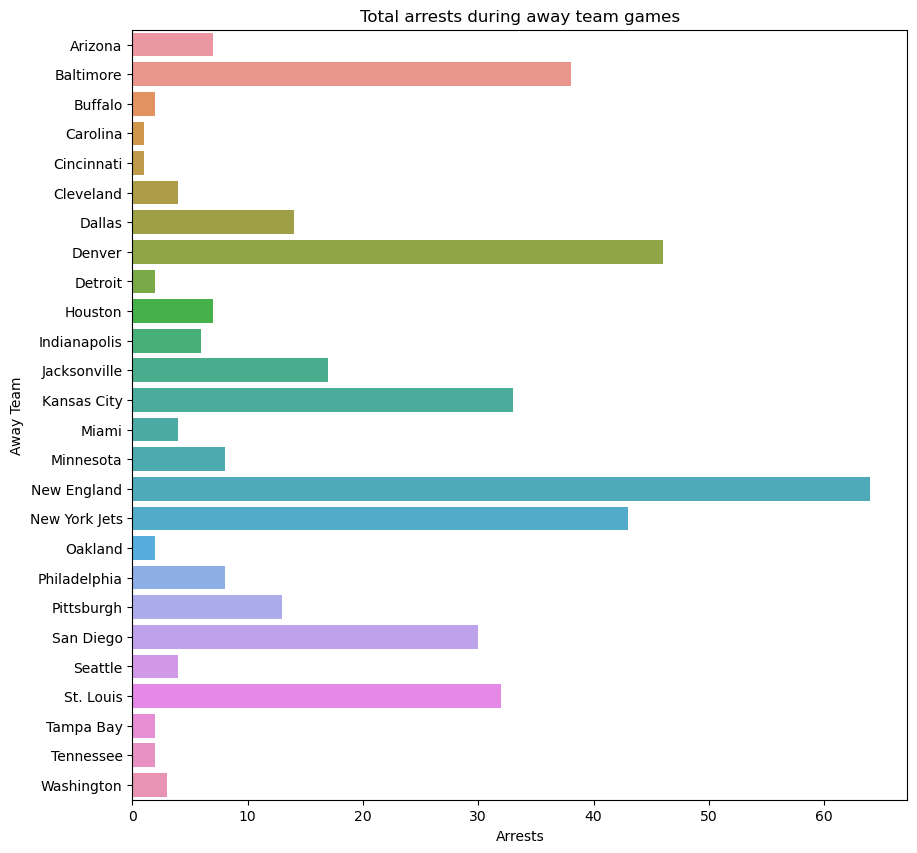

In [49]:
f, ax = plt.subplots(figsize=(10,10)) #Change figure size
sns.barplot(x='Arrests', y = 'Away Team', data=dff3).set(title='Total arrests during away team games',ylabel='Away Team', xlabel='Arrests') #PLot barplot
plt.savefig('..\\images\\AwayArrests.png')

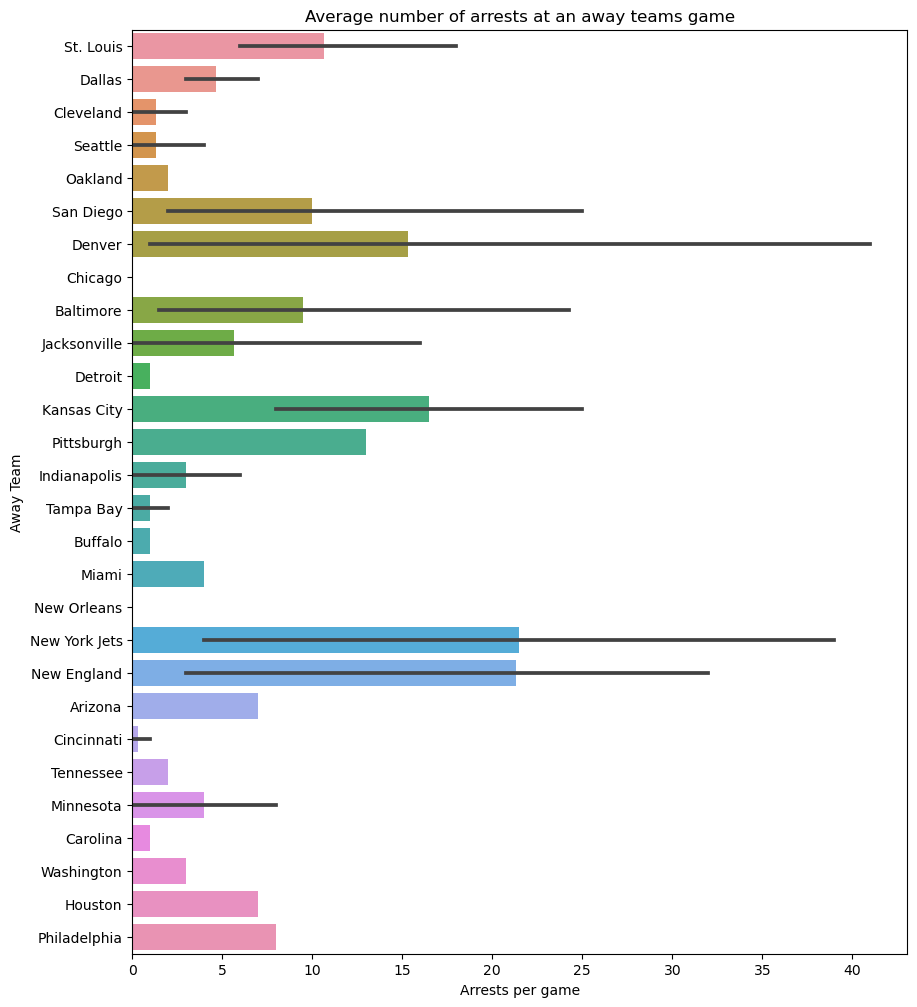

In [50]:
f, ax = plt.subplots(figsize=(10,12)) #Change figure size
sns.barplot(x='Arrests', y = 'Away Team', data=projectdf).set(title='Average number of arrests at an away teams game',ylabel='Away Team', xlabel='Arrests per game') #PLot barplot
plt.savefig('..\\images\\AverageAway.png')

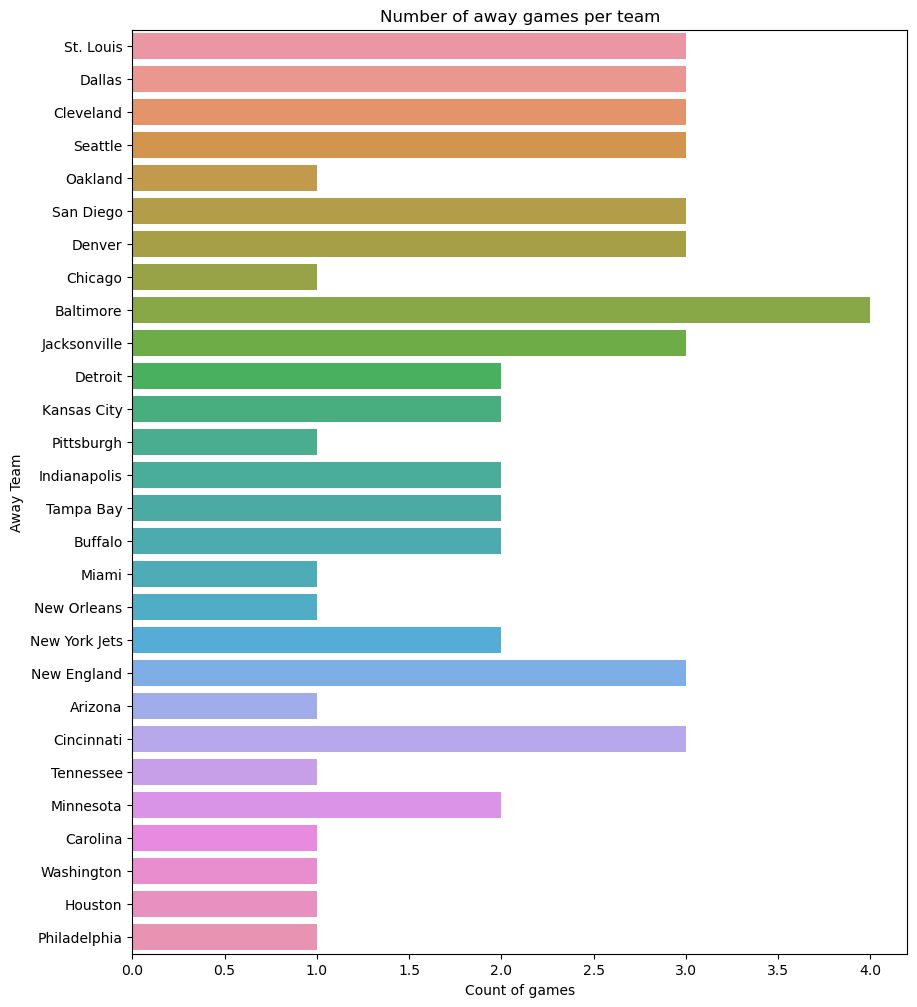

In [51]:
f, ax = plt.subplots(figsize=(10,12)) #Change figure size
sns.countplot(y='Away Team', data=projectdf).set(title='Number of away games per team',ylabel='Away Team', xlabel='Count of games')
plt.savefig('..\\images\\NumAwayGs.png')

Now this gives some interesting insight. Because for away teams, the team with the most arrests is New England (Patriots). They are leading in the number or arrests during their away games, even though they are not leading in the number of away games (count wise). The team with the most away games is Baltimore and yet they have a total of 40 arrests during their away games while New England has closer to 65.

Lastly, let's take a look at whether or not there has been a trend (upwards or downwards) between later seasons and earlier seasons for arrests.

In [37]:
dff4 = projectdf.groupby(["Season"]).Arrests.sum().reset_index() #Sorts by season and sums arrests
dff2 = dff4[dff4['Arrests'] != 0]
dff4.head()

,Season,Arrests
0,2011,70.0
1,2012,109.0
2,2013,65.0
3,2014,38.0
4,2015,111.0


Here we can automatically see that the 2012 and 2015 seasons were the highest recorded arrests in the dataset given.

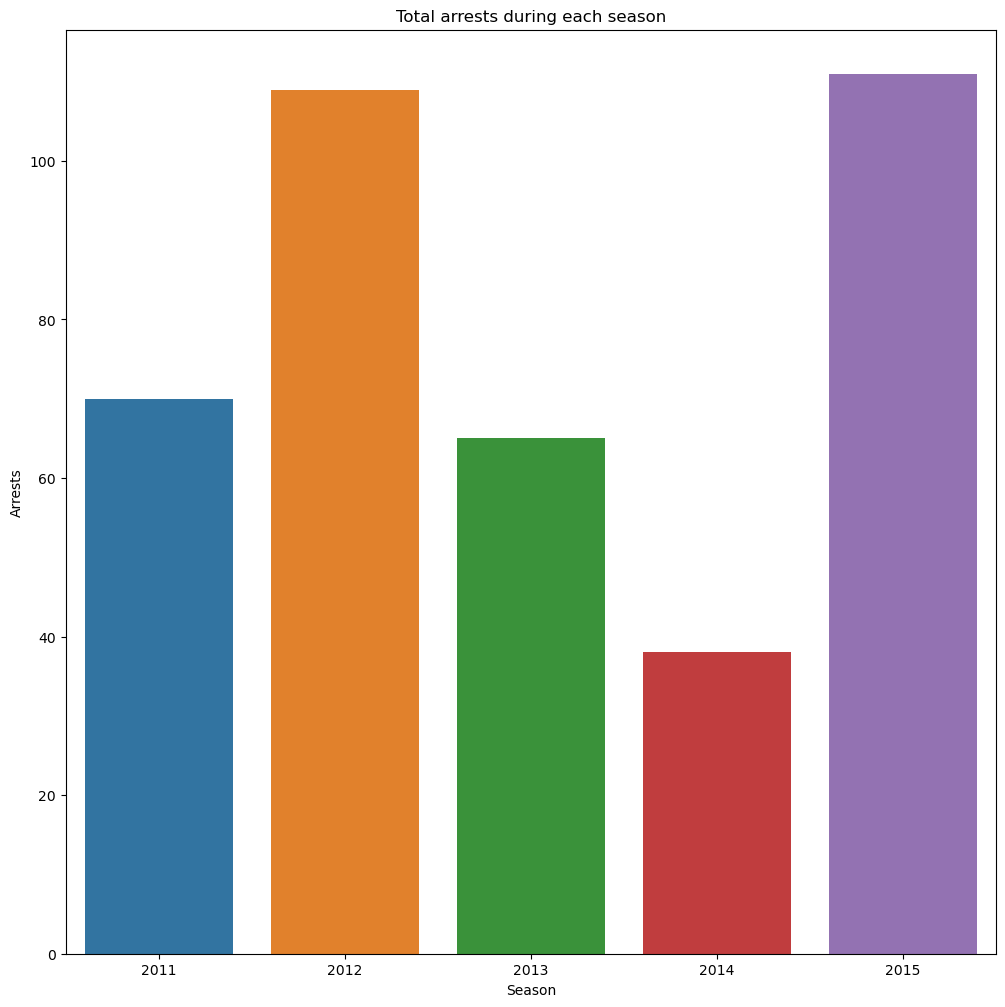

In [52]:
f, ax = plt.subplots(figsize=(12,12)) #Change figure size
sns.barplot(x='Season', y = 'Arrests', data=dff4).set(title='Total arrests during each season',ylabel='Arrests', xlabel='Season') #PLot barplot
plt.savefig('..\\images\\SeasonalArrests.png')

[Text(0.5, 1.0, 'Average number of arrests at games during each season'),
 Text(0, 0.5, 'Average number of arrests'),
 Text(0.5, 0, 'Season')]

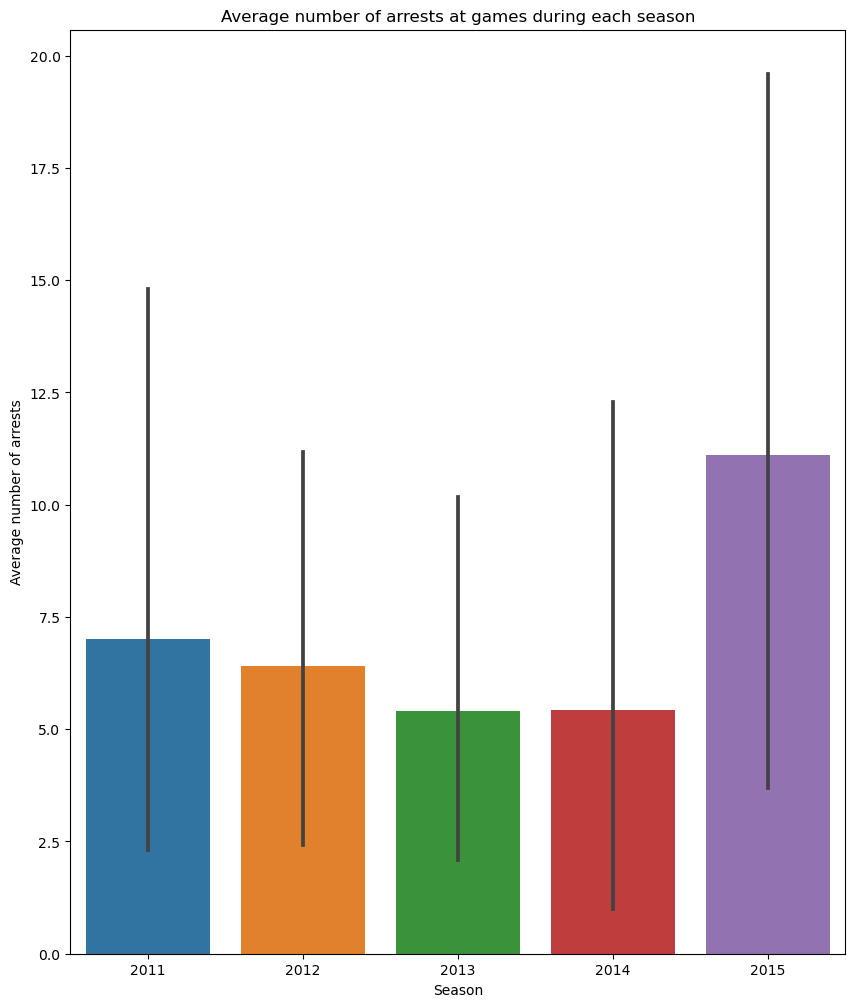

In [39]:
f, ax = plt.subplots(figsize=(10,12)) #Change figure size
sns.barplot(y='Arrests', x = 'Season', data=projectdf).set(title='Average number of arrests at games during each season',ylabel='Average number of arrests', 
                                                                xlabel='Season') #PLot barplot
plt.savefig('..\\images\\EDA2analysis3.png')

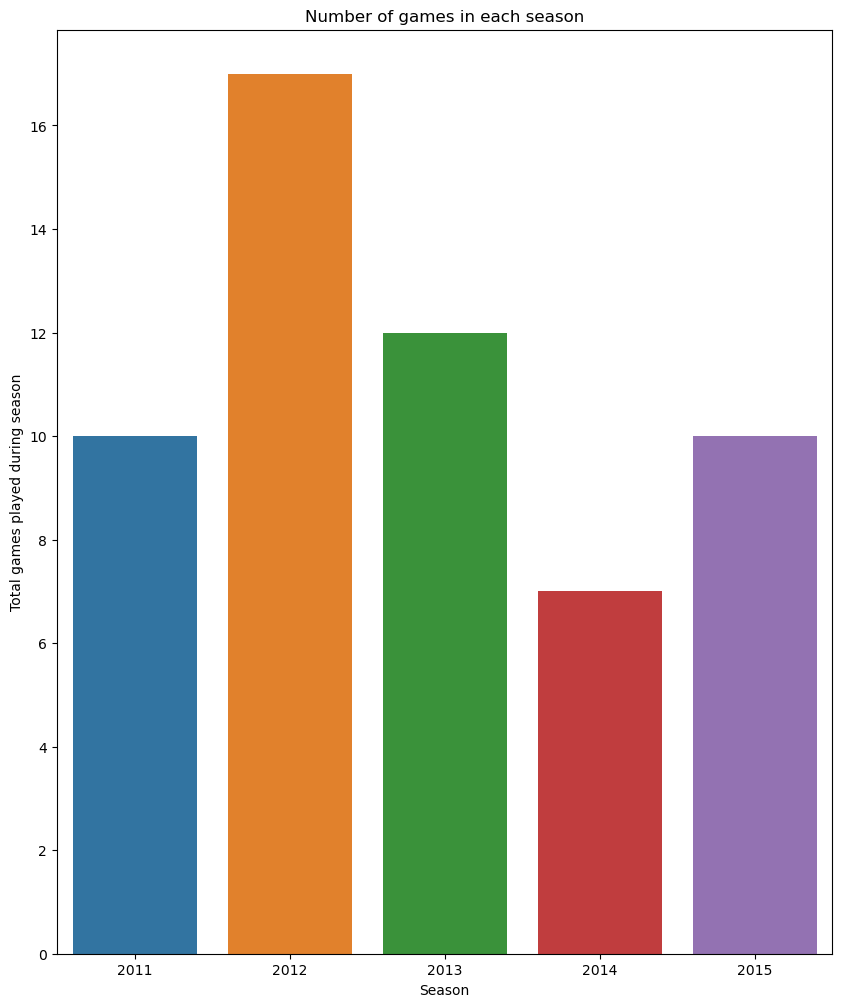

In [53]:
f, ax = plt.subplots(figsize=(10,12)) #Change figure size
sns.countplot(x='Season', data=projectdf).set(title='Number of games in each season',ylabel='Total games played during season', xlabel='Season')
plt.savefig('..\\images\\GamesPerSeason.png')

After looking at the data, we can see that during the 2012 season, there were more games played, thus creating a higher possibility of conflicts resulting in arrests. Nonetheless, the **2015 season** (that had the secondmost arrests during the season) had 2 more arrests during the season even though there were 7 fewer games during then.

*What do these higher arrests within a season, even though there were fewer games than other seasons, tell us?*

After doing some digging, it turns out that the 2015 season was the 50th anniversary of the [Super Bowl.](https://en.wikipedia.org/wiki/2015_NFL_season)
With the opening game being the **New England** Patriots and the Pittsburgh Steelers.

---

## Conclusion

It is clear for the dataset and the graphs provided that arrests during the NFL season do tend to have a correlation between which teams are playing and whether or not they are home or away. The team with the highest arrests rate when they are palying on their home field is the **San Diego (LA Chargers)**. Meanwhile the team with the highest arrests during the games where they are playing on the opponents field is the **New England (Patriots)**.

The games played during the 2015 season had higher average arrests compared to the other seasons in the dataset. With the New England having the highest number of arrests as the Away Team. The reason for New England fans being extremly rowdy is the fact that the team won the 2014 Superbowl, so the crowds were extremly eager to win the 2015 season's Superbowl championship as well. Sadly, the New England Patriots were not the winners of the 2015 Superbowl, and rather the **Denver (Broncos)** were the ones to take the championship. All the winners and superbowl records can be found on [ESPN's](http://www.espn.com/nfl/superbowl/history/winners) website.

Nonetheless, Denver's fans were not the calmest of crowds either. During their away games Denver is the second team with arrests, and are surprisingly one of the calmer teams when they are playing on their home field.